In [1]:
import os
import pandas as pd
import process
import plot
import matplotlib.pyplot as plt

### Load

In [2]:
data_files = os.listdir('data')
dfs_raw = []
for file in data_files:
    if 'flow' in file:
        dfs_raw.append(pd.read_excel(f'data/{file}'))

### Process

In [3]:
dfs_processed = []
for df in dfs_raw:
    dfs_processed.append(process.extract_f114_and_dmso_data(df))

### Normalize & concatenate

In [4]:
dfs_norm = []
for df in dfs_processed:
    dfs_norm.append(process.normalize_to_dmso(df))

data = pd.concat(dfs_norm, ignore_index=True)

### Plot

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dmso v.s. f114: t-test independent samples, P_val=9.198e-04 stat=4.055e+00


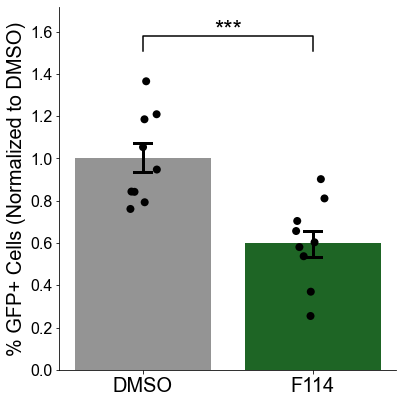

In [5]:
plot.plot_bargraph(data)
# plt.savefig('figures/facs.pdf')